In [1]:
import numpy as np
import matplotlib.pyplot as pl
from line_reduction import *



In [2]:
# Scan Numbers
line_rest_freq = 265.8864339e9
a_scan_list = [82475,82476,82477,82478]                                                                                
b_scan_list = [82480,82481,82482,82483]                                                                                
bank = 0
nchan = 4096
bandwidth = 400.
chan_list = [0,2]

ACCUM_A = Accum()
ACCUM_A_nogen = Accum()
lines_A = []
lines_A_nogen = []
obsnum_A = []
channum_A = []
for o in a_scan_list:
    I,S = read_obsnum(o,chan_list,True) 
    for i,c in enumerate(chan_list):
        line = LineData(I,bank,nchan,bandwidth,S.roach[i].ps_spectrum)
        line.x_vsrc()
        lines_A_nogen.append(line)
        ACCUM_A_nogen.load(line.yarray)
        dvdc = line.dvdc 
        for elist in [1024,2048,3072]:
            #line.yarray[elist] = np.nan
            line.yarray[elist] = (line.yarray[elist+1]+line.yarray[elist-1])/2.
        line_gen = line.xgen(-100,100,dvdc)
        lines_A.append(line_gen)
        obsnum_A.append(o)
        channum_A.append(c)
        ACCUM_A.load(line_gen.yarray)

ACCUM_B = Accum()
ACCUM_B_nogen = Accum()
lines_B = []
lines_B_nogen = []
obsnum_B = []
channum_B = []
for o in b_scan_list:
    I,S = read_obsnum(o,chan_list,True) 
    for i,c in enumerate(chan_list):
        line = LineData(I,bank,nchan,bandwidth,S.roach[i].ps_spectrum)
        line.x_vsrc()
        lines_B_nogen.append(line)
        ACCUM_B_nogen.load(line.yarray)
        dfdc = line.dvdc
        for elist in [1024,2048,3072]:
            #line.yarray[elist] = np.nan
            line.yarray[elist] = (line.yarray[elist+1]+line.yarray[elist-1])/2.
        line_gen = line.xgen(-100,100,dvdc)
        lines_B.append(line_gen)
        obsnum_B.append(o)
        channum_B.append(c)
        ACCUM_B.load(line_gen.yarray)        
    

found roach0_82475_0_1_46P_2018-12-21_072714.nc
append roach0_82475_0_1_46P_2018-12-21_072714.nc
found ifproc_2018-12-21_082475_00_0001.nc
before read npix = 16
from pixels npix = 1
from xlen npix = 4
TRACKING Msip1mm PIXEL  0
/data_lmt/ifproc/ifproc_2018-12-21_082475_00_0001.nc does not have map parameters
/data_lmt/ifproc/ifproc_2018-12-21_082475_00_0001.nc does not have bs parameters
82475 is a Ps observation
read_roach /data_lmt/spectrometer/roach0/roach0_82475_0_1_46P_2018-12-21_072714.nc
r:0 inp:0 pix:0 to:-0.030000
r:0 inp:2 pix:2 to:-0.030000
found roach0_82474_0_1_46P_2018-12-21_072649.nc
append roach0_82474_0_1_46P_2018-12-21_072649.nc
found ifproc_2018-12-21_082474_00_0001.nc
before read npix = 16
from pixels npix = 1
from xlen npix = 4
TRACKING Msip1mm PIXEL  0
/data_lmt/ifproc/ifproc_2018-12-21_082474_00_0001.nc does not have map parameters
/data_lmt/ifproc/ifproc_2018-12-21_082474_00_0001.nc does not have bs parameters
82474 is a Cal observation
read_roach /data_lmt/spect

spec.py:297: RuntimeWarning: divide by zero encountered in divide
  self.tsys_spectrum = 280.*sky_spectrum/(hot_spectrum-sky_spectrum)
spec.py:297: RuntimeWarning: invalid value encountered in divide
  self.tsys_spectrum = 280.*sky_spectrum/(hot_spectrum-sky_spectrum)
spec.py:184: RuntimeWarning: divide by zero encountered in divide
  ps_list[i,:] = (self.main_spectra[i,:]-self.reference_spectra[i,:])/self.reference_spectra[i,:]
spec.py:184: RuntimeWarning: invalid value encountered in divide
  ps_list[i,:] = (self.main_spectra[i,:]-self.reference_spectra[i,:])/self.reference_spectra[i,:]
spec.py:194: RuntimeWarning: invalid value encountered in multiply
  self.ps_spectrum = self.ps_spectrum * tsys_spectrum


read_roach /data_lmt/spectrometer/roach0/roach0_82476_0_1_46P_2018-12-21_073010.nc
r:0 inp:0 pix:0 to:-0.030000
r:0 inp:2 pix:2 to:-0.030000
found roach0_82474_0_1_46P_2018-12-21_072649.nc
append roach0_82474_0_1_46P_2018-12-21_072649.nc
found ifproc_2018-12-21_082474_00_0001.nc
before read npix = 16
from pixels npix = 1
from xlen npix = 4
TRACKING Msip1mm PIXEL  0
/data_lmt/ifproc/ifproc_2018-12-21_082474_00_0001.nc does not have map parameters
/data_lmt/ifproc/ifproc_2018-12-21_082474_00_0001.nc does not have bs parameters
82474 is a Cal observation
read_roach /data_lmt/spectrometer/roach0/roach0_82474_0_1_46P_2018-12-21_072649.nc
r:0 inp:0 pix:0 to:-0.030000
r:0 inp:2 pix:2 to:-0.030000
found roach0_82477_0_1_46P_2018-12-21_073306.nc
append roach0_82477_0_1_46P_2018-12-21_073306.nc
found ifproc_2018-12-21_082477_00_0001.nc
before read npix = 16
from pixels npix = 1
from xlen npix = 4
TRACKING Msip1mm PIXEL  0
/data_lmt/ifproc/ifproc_2018-12-21_082477_00_0001.nc does not have map par

In [3]:
ACCUM_A.ave()
ACCUM_A_nogen.ave()

ACCUM_B.ave()
ACCUM_B_nogen.ave()

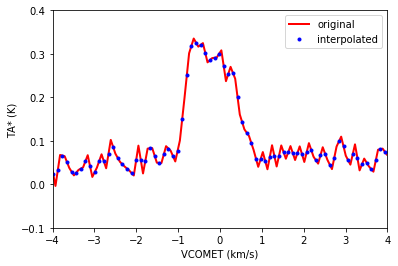

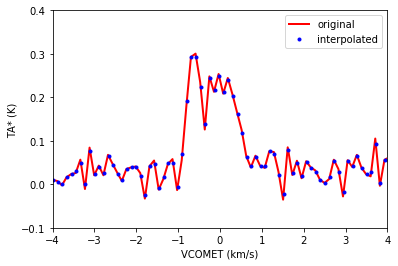

In [4]:
pl.plot(lines_A_nogen[0].xarray,ACCUM_A_nogen.average,'r',label='original')
pl.plot(lines_A[0].xarray,ACCUM_A.average,'b.',label='interpolated')
pl.axis([-4,4,-.1,.4])
pl.xlabel('VCOMET (km/s)')
pl.ylabel('TA* (K)')
pl.legend()

pl.figure()
pl.plot(lines_B_nogen[0].xarray,ACCUM_B_nogen.average,'r',label='original')
pl.plot(lines_B[0].xarray,ACCUM_B.average,'b.',label='interpolated')
pl.axis([-4,4,-.1,.4])
pl.xlabel('VCOMET (km/s)')
pl.ylabel('TA* (K)')
pl.legend()



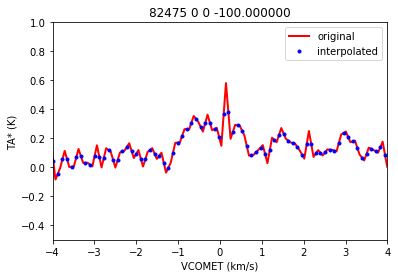

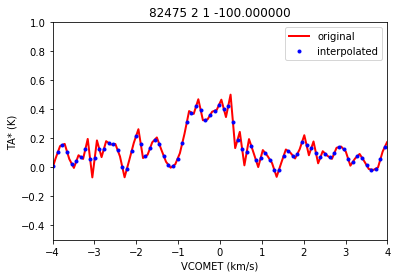

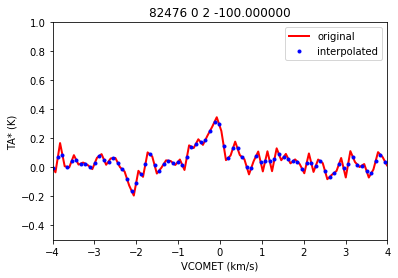

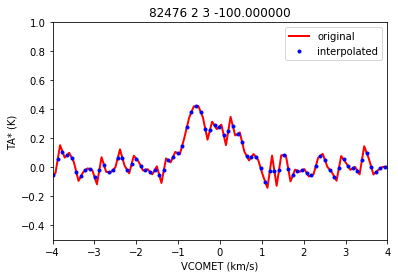

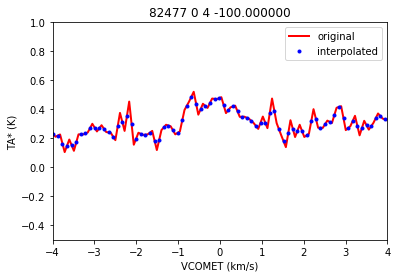

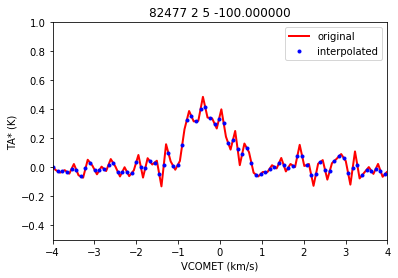

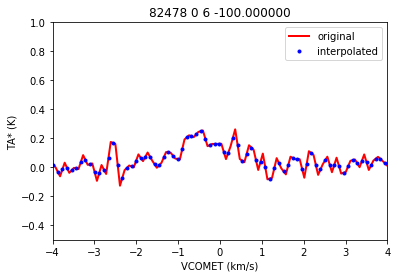

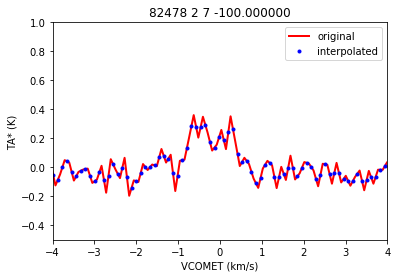

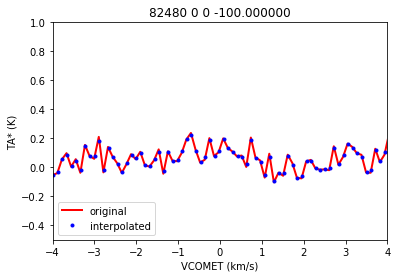

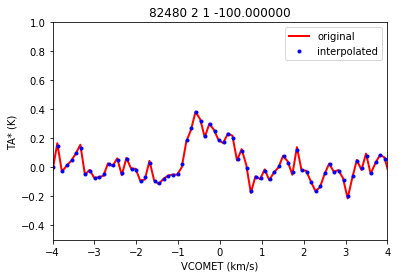

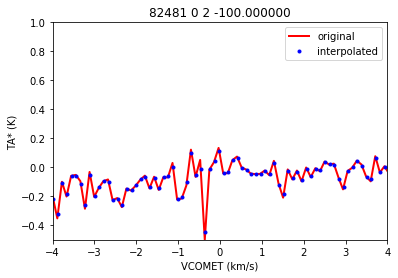

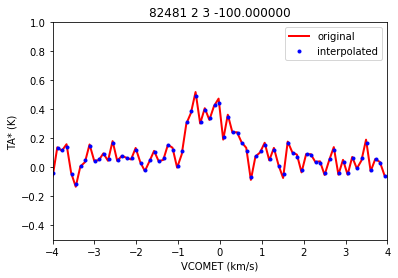

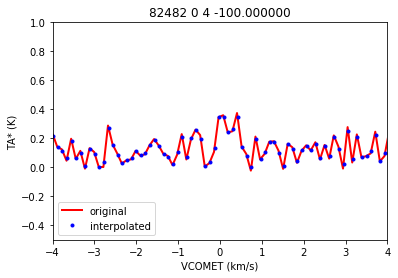

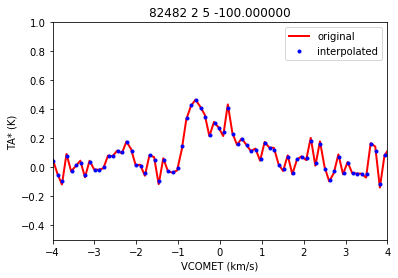

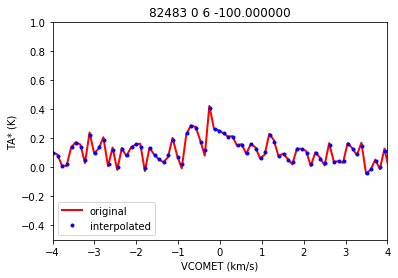

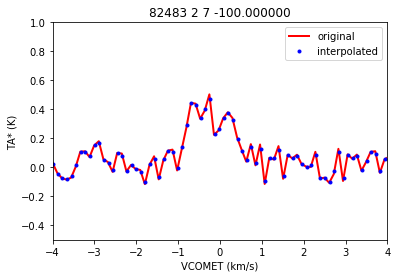

In [10]:
axis = [-4,4,-.5,1]
for i in range(len(lines_A)):
    pl.figure()
    pl.plot(lines_A_nogen[i].xarray,lines_A_nogen[i].yarray,'r',label='original')
    pl.plot(lines_A[i].xarray,lines_A[i].yarray,'b.',label='interpolated')
    pl.title('%d %d %d %f'%(obsnum_A[i],channum_A[i],i,lines_A[i].xarray[0]))
    pl.axis(axis)
    pl.xlabel('VCOMET (km/s)')
    pl.ylabel('TA* (K)')
    pl.legend()


for i in range(len(lines_B)):
    pl.figure()
    pl.plot(lines_B_nogen[i].xarray,lines_B_nogen[i].yarray,'r',label='original')
    pl.plot(lines_B[i].xarray,lines_B[i].yarray,'b.',label='interpolated')
    pl.title('%d %d %d %f'%(obsnum_B[i],channum_B[i],i,lines_B[i].xarray[0]))
    pl.axis(axis)
    pl.xlabel('VCOMET (km/s)')
    pl.ylabel('TA* (K)')
    pl.legend()



In [7]:
ACCUM = Accum()
good_A = [0,1,2,3,4,5,6,7]
good_B = [0,1,  3,4,5,6,7]
for i in good_A:
    ACCUM.load(lines_A[i].yarray)
for i in good_B:
    ACCUM.load(lines_B[i].yarray)
ACCUM.ave()



(-20, 20)

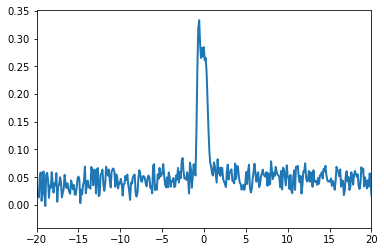

In [8]:
pl.plot(lines_A[0].xarray,ACCUM.average)
pl.xlim([-20,20])

YINT = 0.331144 (0.009233)
XMEAN = -0.012426


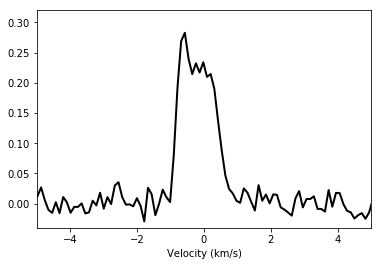

In [9]:
a = Line(lines_A[0].iarray,lines_A[0].xarray,ACCUM.average,'Velocity (km/s)')
bl,nbl = a.xlist([[-10.,-2.],[2.,10.]])
a.baseline(bl,nbl,2)
pl.plot(a.xarray,a.yarray,'k')
pl.xlabel(a.xname)
pl.axis([-5,5,-.04,.32])
ll,nll = a.xlist([[-2.,2.]])
a.line_stats(ll,nll)
print('YINT = %f (%f)'%(a.yint,a.yerr))
print('XMEAN = %f'%(a.xmean))






In [11]:
llp,nllp = a.xlist([[-5,5]])
for c in llp:
    print a.xarray[c],a.yarray[c]

-4.97555043923 0.0120230620985
-4.86544099594 0.0268439146323
-4.75533155265 0.00586108635551
-4.64522210936 -0.0102542250159
-4.53511266607 -0.0152509858979
-4.42500322278 0.00235811409915
-4.31489377948 -0.0156695530383
-4.20478433619 0.0109176737692
-4.0946748929 0.00222039101252
-3.98456544961 -0.0150778142436
-3.87445600632 -0.00534215074132
-3.76434656302 -0.00542567096719
-3.65423711973 0.000362220426765
-3.54412767644 -0.0162355195519
-3.43401823315 -0.0143814532858
-3.32390878986 0.00484659411932
-3.21379934657 -0.00292881437968
-3.10368990327 0.0180125017588
-2.99358045998 -0.00826937242353
-2.88347101669 0.0107476218577
-2.7733615734 -0.00071370559141
-2.66325213011 0.0300352396219
-2.55314268682 0.0354817682937
-2.44303324352 0.0109982022907
-2.33292380023 -0.0015677575463
-2.22281435694 -0.00123444323392
-2.11270491365 -0.00438847752536
-2.00259547036 0.00908820388836
-1.89248602707 -0.00396250240859
-1.78237658377 -0.0294350388022
-1.67226714048 0.0262683232977
-1.5621576